# Trabajo Practico semana 4bis
## Nicolas Pereyra
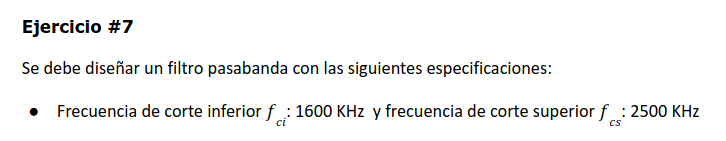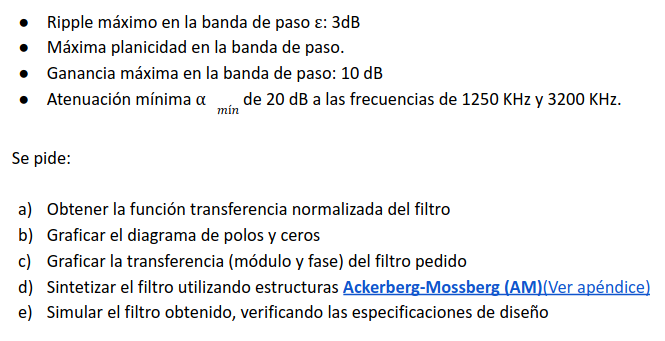

Filtro butterworth ($\epsilon = 1$)
### Nomalizacion de frecuencia:
$f_o = \sqrt{f_{p1}.f_{p2}}$  
  
| $f_{s1n}$   | $f_{p1n}$   | $f_{p2n}$   |$f_{s2n}$    |
|-------------|-------------|-------------|-------------|
|$\frac{5}{8}$|$\frac{4}{5}$|$\frac{5}{4}$|$\frac{8}{5}$|

### Nucleo de trasformacion:  
$k(s) = \frac{q}{w_o} \frac{s²+w_o²}{s} \Rightarrow k_n(s) = q \frac{s²+1}{s}$  
Siendo $q$ inversamente proporcional a $BW$ en caso de tomar a $w_o$ normalizada:  
$BW = f_{p2n}-f_{p1n} = \frac{9}{20}  \Rightarrow  q = \frac{20}{9}$

### Calculo que lado del pasa banda exige una mayor pendiente:
$k_n(w) = \frac{20}{9} \frac{w²-1}{w}$   
$k_n(w_{s1n}) = -2.166$  
$k_n(w_{s2n}) = 2.166$  
  
Dado que $|k_n(w_{s1n})| = |k_n(w_{s2n})|$ la exigencia por cada lado del filtro van a ser las mismas.  

### Calculo el orden del pasa bajos:
$n = \frac{log(\frac{10^{\alpha.min/10}-1}{\epsilon²})}{2.log(|k_n(w_{s1n})|)} \thickapprox
 3 $
 
### Ganancia pedida:
Para saber cuanta gananacia hay que ponerle a la transferencia vamos a evaluar la transferencia que se obtendra mas adelante en $fo$:  

$T_{bp}(fo)=-12.33dB$  
  
$A_{db} = 10dB-(-12.33dB) = 22.33dB \Rightarrow A=13.07$

## Paso de pasa bajos a pasa banda:
Para lograr esto tenemos que utilizar el nucleo de transformacion ateriormente nombrado y colocarlo en el filtro pasa banda pasa bajos obtenido. Debido a que el filtro pasa bajos dados es de $3°$ orden y butterworth la tranferencia del filtro normalizado queda de la siguiente forma:  
<font size="4"> <p style="text-align: center;">
$T_{lpn}=\frac{1}{(s+1)(s²+s+1)} \Rightarrow T_{bpn}=\frac{1}{(q\frac{(s²+1)}{s}+1)((q\frac{(s²+1)}{s})²+q\frac{(s²+1)}{s}+1)}$  
<font size="2"> <p style="text-align: left;">
Quedando el filtro pasa banda de la siguiente forma:  
<font size="4"> <p style="text-align: center;">
$T_{bpn} = \frac{s/q}{s²+s/q+1}.\frac{s²/q²}{s⁴+s³/q+s²(2+1/q²)+s.1/q+1}$  
<font size="2"> <p style="text-align: left;">
Para obtener la transferencia total del filtro en forma de $3$ multiplicaciones de filtros de $2°$ orden debemos obtener los polos de la transferencia. Para poder obtener analiticamente los polos del voy a obtener las raices del de la transferencia pasa bajos y utilizar el nucleo de transformacion para poder ubicar cada polo.  

<font size="3"> <p style="text-align: left;">
<u>Raices LP:</u>
 - $R_{1lp} = -1$
 - $R_{2lp} = e^{i.\pi.2/3}$
 - $R_{3lp} = e^{i.\pi.2/3}$
    
<u>Raices BP:</u>
 - $q\frac{R_{1bp}²+1}{s} = -1 \Rightarrow R_{11bp} = e^{i.1.7977} ; R_{12bp} = e^{-i.1.7977}$
 - $q\frac{R_{2bp}²+1}{s} = e^{i.\pi.2/3} \Rightarrow R_{21bp} = 1.2151.e^{i.1.6814} ; R_{22bp} = 0.8230.e^{-i.1.6814}$
 - $q\frac{R_{3bp}²+1}{s} = e^{-i.\pi.2/3}  \Rightarrow R_{31bp} = 1.2151.e^{-i.1.6814} ; R_{32bp} = 0.8230.e^{i.1.6814}$
  
    
<font size="2"> <p style="text-align: left;">
Teniendo cada raiz con sus cojugado solo queda obtener cada trasnferencia intermedia y agregarle la ganancia pedida:  
<font size="4"> <p style="text-align: center;">
$T_{bp}(s) = T1(s).T2(s).T3(s) = A.\frac{s.\frac{k_1}{q_1}}{s²+\frac{k_1}{q_1}.s+k_1²} \frac{s.\frac{k_2}{q_2}}{s²+\frac{k_2}{q_2}.s+k_2²} \frac{s.\frac{k_3}{q_3}}{s²+\frac{k_3}{q_3}.s+k_3²}$  
<font size="2"> <p style="text-align: left;">  
(Las variables $k$ son una relacion entre la velocidad angular de la transferencia intermedia y la velocidad angular utilizada al normalizar. Por otro lado la variable $A$ regresenta la ganancia de $10dB$ que tiene el filtro)    
- $k_1 = 1$
- $k_2 = 1.2151$
- $k_3 = 0.8230$

Para calcular el $q$ vamos a utilizar una relacion con los polos que tiene este variable en transferencias de $2°$ orden:  
$q = \frac{1}{2.cos(\phi)}$  
- $q_1 = \frac{1}{2.cos(\phi_1)} = 2.2226$  
- $q_2 = \frac{1}{2.cos(\phi_2)} = 4.5298$  
- $q_3 = \frac{1}{2.cos(\phi_3)} = 4.5298$  
    
Finalmente la tranferencia queda de la siguiente forma:  
<font size="4"> <p style="text-align: center;">
$T_{bpn}(s) = 13.07.\frac{s.0.449}{s²+0.449.s+1} \frac{s.0.268}{s²+0.268.s+1.2577} \frac{s.0.181}{s²+0.181.s+0.677}$ 

(3, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

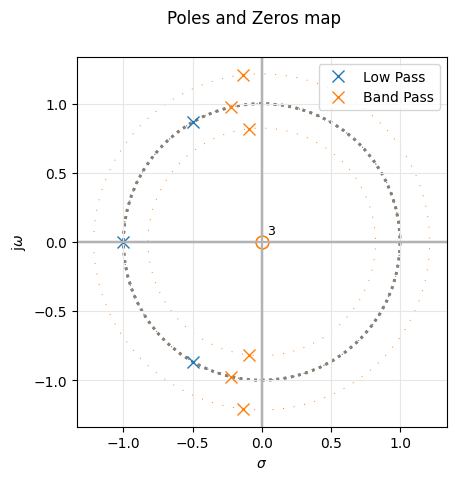

In [26]:
# Módulos externos

import sympy as sp
from sympy.abc import s

# Módulos externos
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from pytc2.sistemas_lineales import pzmap, bodePlot, tf2sos_analog, analyze_sys, parametrize_sos, pretty_print_lti, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

n = 3
fs1 = 1250
fs2 = 3.2*10**3
fp1 = 1.6*10**3
fp2 = 2.5*10**3
fo = (fp1*fp2)**(1/2)
A = 3.1622

wo = 2*np.pi*fo
bw = (fp2-fp1)*2*np.pi

#Pasa bajos
b_lp, a_lp = signal.butter(n, 1,analog=True, output='ba')
tf_lp = signal.TransferFunction(b_lp,a_lp)
pzmap(tf_lp, fig_id=3, filter_description  = "Low Pass") #S plane pole/zero plot

#Pasa banda normalizado
b_n, a_n = signal.lp2bp(b_lp,a_lp,1,9/20)
b_n = b*A #Le pongo ganancia
tf_n = signal.TransferFunction(b_n,a_n)
pzmap(tf_n, fig_id=3, filter_description  = "Band Pass") #S plane pole/zero plot

En este grafico se pueden obserbar los polos y ceros de ambos filtros de ambos filtros normalizados.

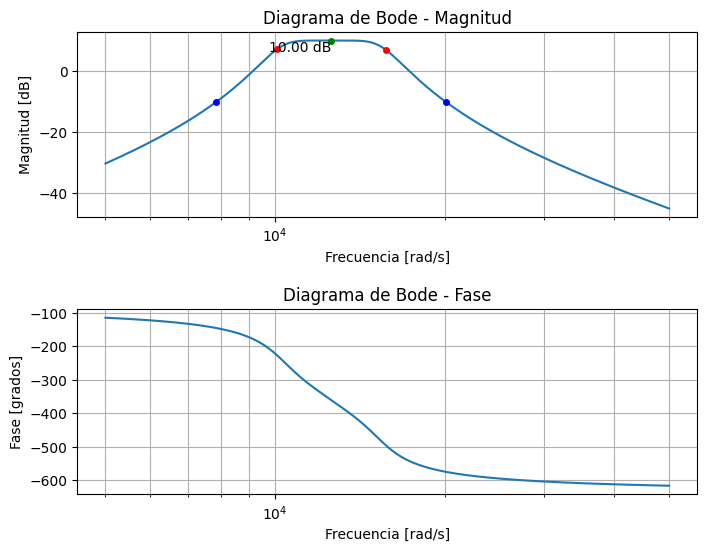

In [25]:
#Pasa banda desnormalizado
b_bp, a_bp = signal.lp2bp(b_lp,a_lp,wo,bw)
b_bp = b_bp*A #Le pongo ganancia
tf_bp = signal.TransferFunction(b_bp,a_bp)

#q = tf2sos_analog(tf) NO ME FUNCIONO ESTA FUNCION
#--------------------------------------------------------------
## Mantengo graficos de igual tamaño
start_freq = 5*10**3
end_freq = 5*10**4
frecuencias = np.logspace(np.log10(start_freq), np.log10(end_freq), num=1000)

# Generar el grillado de frecuencias
w, mag, phase = signal.bode(tf_bp,frecuencias)

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
fig.subplots_adjust(hspace=0.5)

# Graficar la magnitud en dB con grillado
ax1.semilogx(w, mag)
ax1.set_xscale('log')
ax1.set_xlabel('Frecuencia [rad/s]')
ax1.set_ylabel('Magnitud [dB]')
ax1.set_title('Diagrama de Bode - Magnitud')
ax1.grid(True, which="both")

# Marcar fp1
idx_1 = np.where(w >= (2*np.pi*fp1))[0][0]
mag_marker_1 = mag[idx_1]
ax1.plot(w[idx_1], mag[idx_1], 'ro', markersize=4)

# Marcar fp2
idx_2 = np.where(w >= (2*np.pi*fp2))[0][0]
mag_marker_2 = mag[idx_2]
ax1.plot(w[idx_2], mag[idx_2], 'ro', markersize=4)

# Marcar fs1
idx_3 = np.where(w >= (2*np.pi*fs1))[0][0]
mag_marker_3 = mag[idx_3]
ax1.plot(w[idx_3], mag[idx_3], 'bo', markersize=4)

# Marcar fs1
idx_4 = np.where(w >= (2*np.pi*fs2))[0][0]
mag_marker_4 = mag[idx_4]
ax1.plot(w[idx_4], mag[idx_4], 'bo', markersize=4)

# Marcar fso
idx_4 = np.where(w >= (2*np.pi*fo))[0][0]
mag_marker_4 = mag[idx_4]
ax1.plot(w[idx_4], mag[idx_4], 'go', markersize=4)
ax1.text(w[idx_4], mag[idx_4], f'{mag_marker_4:.2f} dB', ha='right', va='top')


# Graficar la fase en grados con grillado
ax2.semilogx(w, phase)
ax2.set_xscale('log')
ax2.set_xlabel('Frecuencia [rad/s]')
ax2.set_ylabel('Fase [grados]')
ax2.set_title('Diagrama de Bode - Fase')
ax2.grid(True, which="both")

# Mostrar la figura
plt.show()

Desconpongo la funcion trasferencia de 6° a 3 trasferencias de 2°. Debido a que no me funciono la funcion t2sos_analog obtuve las trasferencias de 2° conociendo la ubicacion de los polos. Esto lo hice sabiendo que la funcion trasferencia de un funcion trasferencia se puedo escribir de la siguiente forma:  
<font size="4"> <p style="text-align: center;">
$T(s) = A.\frac{s.\frac{w_n}{q}}{s²+\frac{w_n}{q}.s+w_n²}$  
<font size="2"> <p style="text-align: left;">    
  
Quedando nuestra funcion trasferencia equivalente de la siguiente forma:  
<font size="4"> <p style="text-align: center;">
$T(s) = A.T1(s).T2(s).T3(s) = A.\frac{s.\frac{w_1}{q_1}}{s²+\frac{w_1}{q_1}.s+w_1²} \frac{s.\frac{w_2}{q_2}}{s²+\frac{w_2}{q_2}.s+w_2²} \frac{s.\frac{w_3}{q_3}}{s²+\frac{w_3}{q_3}.s+w_3²}$  
<font size="2"> <p style="text-align: left;">    
  
Siento los $w$ y los $q$ datos obtenidos de el diagrama de polos y ceros.  
<font size="4"> <p style="text-align: center;">
$T1(s) = \frac{s.\frac{w_1}{q_1}}{s²+\frac{w_1}{q_1}.s+w_1²}= \frac{s.3.377.10³}{s²+3.377.10³.s+234.10⁶}$  
$T2(s) = \frac{s.\frac{w_2}{q_2}}{s²+\frac{w_2}{q_2}.s+w_2²}= \frac{s.2.273.10³}{s²+2.273.10³.s+106.10⁶}$  
$T3(s) = \frac{s.\frac{w_3}{q_3}}{s²+\frac{w_3}{q_3}.s+w_3²}= \frac{s.5.675.10³}{s²+5.675.10³.s+158.10⁶}$  

<font size="2"> <p style="text-align: left;">    

## Ackerberg Mossberg
### Transferencia:
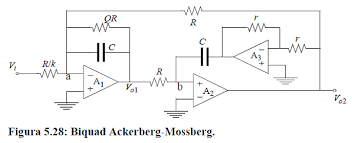

<font size="4"> <p style="text-align: center;">
$H(s) = \frac{-s.\frac{k}{R.C}}{s²+s.\frac{1}{C.q.R}+\frac{1}{C².R²}}$
<font size="2"> <p style="text-align: left;">


Concidero a todos los capacitores de estas 3 trasferencias iguales a $C = 80 nF$ y $R_o$ = 1k

#### T1(s)
$R_1 = R_o/k1 = 1k\Omega$  
$k_1 = 0.22 = \frac{1}{q}.(A)^{1/3} = 0.51$  
$q_1 = 4.54$  

#### T2(s)
$R_2 = R_o/k2 = 822\Omega$  
$k_2 = 0.22 = \frac{1}{q}.(A)^{1/3} = 0.51$  
$q_2 = 4.54$  

#### T3(s)
$R_3 = R_o/k3 = 1215\Omega$  
$k_3 = 0.454 = \frac{1}{q}.(A)^{1/3} = 1.07$  
$q_3 = 2.2$



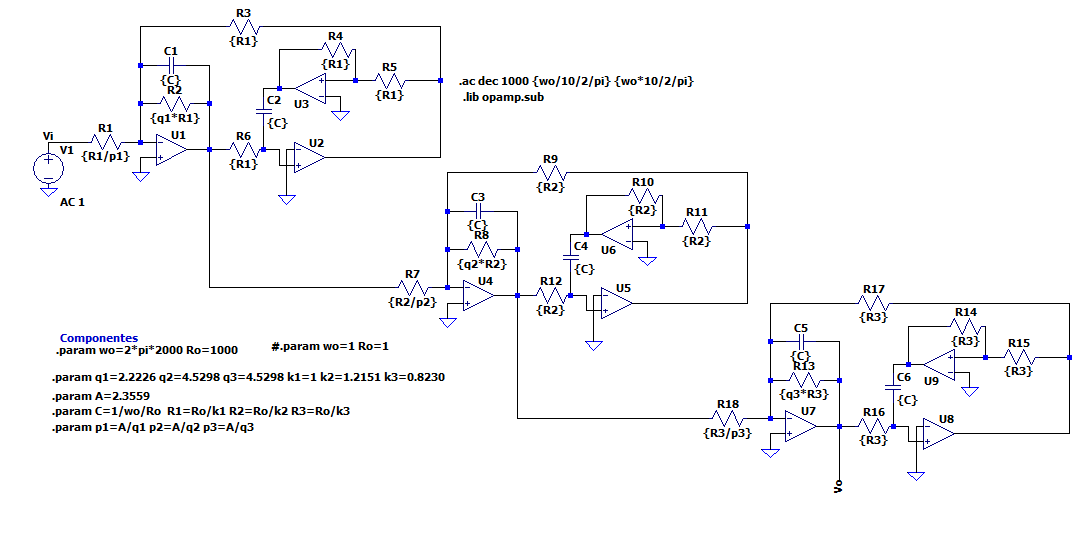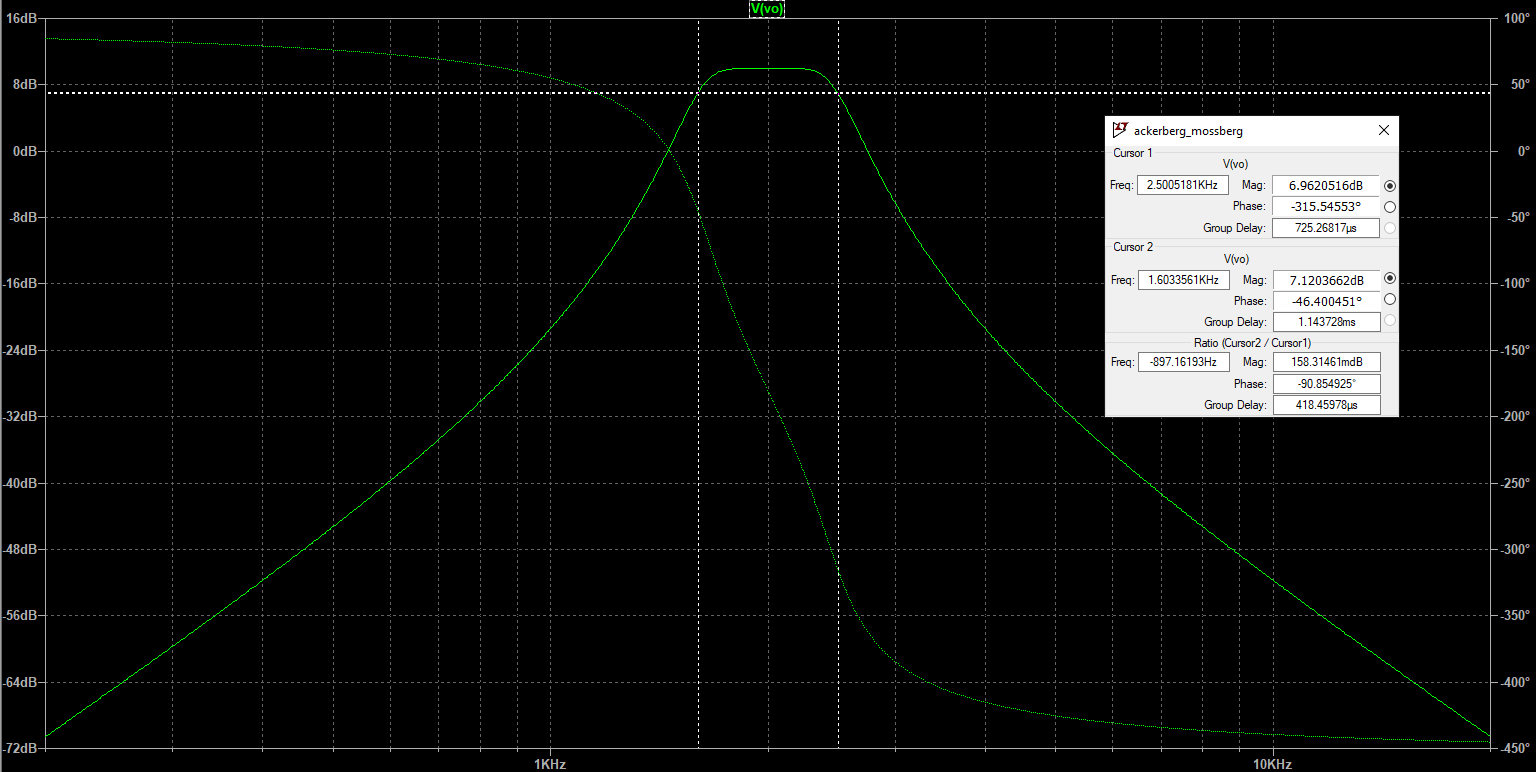

## Conclucion:
En este trabajo practico se pudo poner en practica la transformacion de lp a bp con la adaptacion circuital de un ackerberg mossberg. Durante el ejercicio se pudo observar que los filtros pasa banda requieren de una ganancia para tener una ganancia positiva, de lo contrario las señales que pasen por el filtro seran muy atenuandos ingluso en la sona de paso. Otro caracteristica que se pudo observar de los filtros pasa banda es que poseen una velocidad de pase no lineal en la banda de paso.